In [ ]:
# @title Văn bản tiêu đề mặc định
import requests # web: html + css
from bs4 import BeautifulSoup as bs
import random
import pandas as pd
from time import sleep
from selenium import webdriver # web: html + css + javasricpt
from selenium.webdriver.common.keys import Keys #Keys: cung cấp các phím trên bàn phím
from selenium.webdriver.common.by import By # By: định vị các thành phần trong tài liệu.
from selenium.webdriver.chrome.service import Service
import os
import urllib3 # download
from urllib.parse import urlparse, urljoin
import wget
from webdriver_manager.chrome import ChromeDriverManager

Status code: 200
Content: <class 'bytes'>
Content: b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>S\xc3\xa1ch n\xc3\xb3i Truy\xe1\xbb\x87n L\xe1\xbb\x8bch S\xe1\xbb\xad mp3, nghe v\xc3\xa0 t\xe1\xba\xa3i mi\xe1\xbb\x85n ph\xc3\xad</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://phatphapungdung.com/sach-noi/xmlrpc.php" />\r\n    <link rel="icon" type="image/png" href="https://phatphapungdung.com/wp-content/uploads/2016/07/favicon-phat-phap-ung-dung-1.png">\n<!-- This site is optimized with the Yoast SEO plugin v12.9.1 - https://yoast.com/wordpress/plugins/seo/ -->\n<meta name="description" content="T\xe1\xbb\x95ng h\xe1\xbb\xa3p S\xc3\xa1ch n\xc3\xb3i Truy\xe1\xbb\x87n L\xe1\xbb\x8bch S\xe1\xbb\
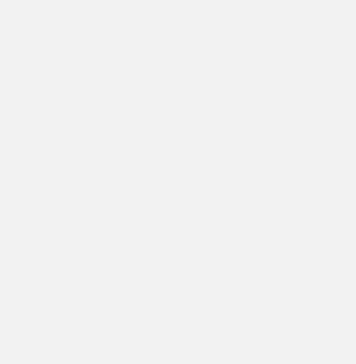
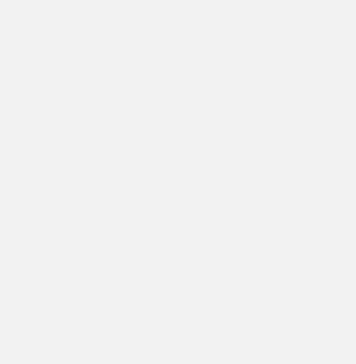
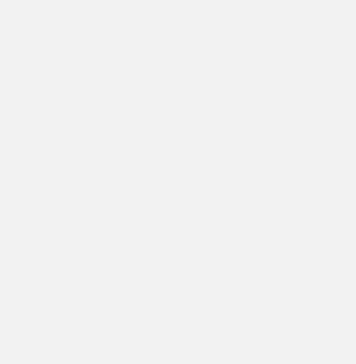
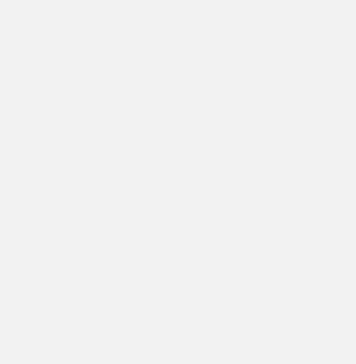

In [2]:
# thiết lập url và kiểm tra kết nối
url = "https://phatphapungdung.com/sach-noi/truyen-lich-su-audio" # địa chỉ web cần crawl data
r = requests.get(url) # # Send an HTTP request to the URL and lấy data chưa qua xử lý
print("Status code:", r.status_code)
print("Content:", type(r.content))
print("Content:", r.content)


In [15]:
# open it, go to a website, and get results
# Tạo đối tượng Service
service = Service("C:\\Users\\Admin\\.wdm\\drivers\\chromedriver\\win64\\131.0.6778.204\\chromedriver-win32/chromedriver.exe")
wd = webdriver.Chrome(service=service)
# wd = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
wd.get(url) #điều hướng đến trang được cung cấp bởi URL.
print(len(wd.page_source)) #
print(type(wd.page_source))  # <class 'str'>

187992
<class 'str'>


In [ ]:
html_doc = wd.page_source
soup = bs(html_doc, 'html.parser')
print(soup.prettify())

In [ ]:
# tạo thư mục làm việc
working_path=r"D:\anh\download\craw-data\phatphapungdung"
os.chdir(working_path)
print(os.getcwd())

In [ ]:
def stop_next():
    print("Function stop_next running")
    while(True):
        sleep(0.5)
        key = input("Enter 'ok' to next: ").strip().lower()
        if key == "ok":
            print("Program is continuing")
            return

In [ ]:
def sleepRandom(start=1, end=3, phay=2): # hàm random thời gian ngủ để qua khâu kiểm duyệt 
    # start/end: random time from start -> end 
    # phay: phần trăm của 1 số vd phay=2 -> 2.22
    phantram = 10**phay
    thoigian = random.randint(start*phantram, end*phantram)/phantram
    sleep(thoigian)


In [ ]:
# hàm ghi file: đường dẫn, văn bản
def writeFileTxt(path_file, text, mode='w', encoding='UTF-8'):
  print('function: writeFileTxt running')
  # Check if the text is a set
  if isinstance(text, set):
    text = list(text)
  # Check if the text is a list/tuple.
  if isinstance(text, (list, tuple)):
    text = '\n'.join(text)
  with open(path_file, mode=mode, encoding=encoding) as file:
    file.write(text)
    print("write text:", text)
  print('Finished function: writeFileTxt')


In [ ]:

# hàm download file: # url / path to fordel -> mode = 1/file -> mode = 0
def downloadFile(url, path_file, mode=0):
  print('function: downloadFile running')
  response = requests.get(url) # send request to url and receive result
  if response.status_code == 200: # check status connection: 200 is OK
    if mode == 1:
      name_file = os.path.basename(urlparse(url).path)
      path_file = os.path.join(path_file, name_file)
    dir_name = os.path.dirname(path_file)
    if dir_name != "" and not os.path.exists(dir_name):
      os.makedirs(dir_name)
    with open(path_file, 'wb') as file: # write file jpg/png
        file.write(response.content)
    print(f"Downloaded: {url}")
  else:
    print(f"Failed to download: {url}")
  response.close()
  sleepRandom()
  print('Finished function: downloadFile')


# hàm download file Pro: # url / path to fordel -> mode = 1/file -> mode = 0: pdf/mp3/mp4
def downloadFilePro(url, path_file, mode=0):
  print('function: downloadFilePro running')
  try:
    if mode == 1:
      name_file = os.path.basename(urlparse(url).path)
      path_file = os.path.join(path_file, name_file)
    dir_name = os.path.dirname(path_file)
    if dir_name != "" and not os.path.exists(dir_name):
      os.makedirs(dir_name)
    wget.download(url, out=path_file)
    print(f"Downloaded: {url}")
  except Exception as e:
    print(f"Failed to download: {url}")
    print(e)
  sleepRandom()
  print('Finished function: downloadFilePro')

In [9]:
# định dạng và lấy data bằng thư viện BeautifulSoup
html_doc = wd.page_source
soup = bs(html_doc, 'html.parser')

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=131.0.6778.205)
Stacktrace:
	GetHandleVerifier [0x0059EC13+23731]
	(No symbol) [0x0052C394]
	(No symbol) [0x0040BE63]
	(No symbol) [0x003ED92B]
	(No symbol) [0x00477F7F]
	(No symbol) [0x0048AD99]
	(No symbol) [0x00471BF6]
	(No symbol) [0x00443F35]
	(No symbol) [0x00444EBD]
	GetHandleVerifier [0x0087F0D3+3039603]
	GetHandleVerifier [0x00892DEA+3120778]
	GetHandleVerifier [0x0088B592+3089970]
	GetHandleVerifier [0x006343B0+635984]
	(No symbol) [0x00534DCD]
	(No symbol) [0x00532068]
	(No symbol) [0x00532205]
	(No symbol) [0x00524FD0]
	BaseThreadInitThunk [0x76447BA9+25]
	RtlInitializeExceptionChain [0x776AC0CB+107]
	RtlClearBits [0x776AC04F+191]


In [ ]:
menu_main = soup.find('ul', {'id':"menu-main-1"}) # tìm danh mục
print(menu_main)
a_tabs = menu_main.find_all('a') # get list <a> to source


In [ ]:
# Extract the link and text 
tab = "   "
path_file = "main-menu.txt"
result = list()
for a_tab in a_tabs:
    # Extract the link and text of each a_tab
    link = a_tab.get('href')
    text = a_tab.get_text(strip=True)
    if a_tab.get('class') is not None:
      print(f"Link: {link}, Text: {text}")
      result.append(f"Link: {link}, Text: {text}")
    else:
      print(tab + f"Link: {link}, Text: {text}")
      result.append(tab + f"Link: {link}, Text: {text}")

writeFileTxt(path_file, result) # save on file


In [ ]:
# crawl data to div: main_content
main_content = soup.find('div', {'class': 'td-pb-span8 td-main-content'})
main_content

In [ ]:

a_tabs = main_content.find_all('a', {'class': 'td-image-wrap'}) # get list all <a> to source
folder_image_path = 'image'
file_audio_path = 'audio.txt'
text = list()
for a in a_tabs:
  print('link:', a.get('href'))
  print('text:',a.get_text(strip=True))
  print('title:',a.get('title'))
  img_url = a.find('img').get('data-img-url')
  print('img url:', img_url)
  text.append('link: ' + a.get('href') + ", " + 'title: ' + a.get('title'))
  downloadFile(img_url, folder_image_path, 1)


In [ ]:
writeFileTxt(file_audio_path, text) # write link and title vào file audio.txt

In [ ]:
# craw data to div: playlist | url_music, name_file
url_music = 'https://phatphapungdung.com/sach-noi/toi-tu-hoc-189279.html'
name_file = ""
driver = webdriver.Chrome()
tracks_data = {'title': list(), 'track': list(), 'link': list()}
try:
    driver.get(url_music)
    soup = bs(driver.page_source, 'html.parser')
    playlist = soup.find('div', {'class': 'fp-playlist-external is-audio fv-playlist-design-2017 visible-captions fp-playlist-horizontal fp-playlist-has-captions skin-youtuby'})
    print(playlist)
    sleepRandom()
finally:
    driver.quit()



In [ ]:
# Find the <a> element using BeautifulSoup
a_elements = playlist.find_all('a', {'data-item': True})
a_elements


In [ ]:
def downloadAudio(driver, link):
    try:
        driver.get(link)
        # sleepRandom()
        # pag.press("space")
        # sleepRandom()
        # pag.hotkey("ctrl","s")
        # sleepRandom()
        # pag.press('enter')
        # stop_next()
        sleepRandom()
        pag.click(x=606, y=626)
        sleepRandom()
        pag.click(x=501, y=570)
        print("download success | " + f"Source URL: {link}")
    except Exception as e:
        print('error download audio')
        print(e)
        

In [ ]:
driver = webdriver.Chrome()
# duyệt toàn bộ thẻ a
for a_element in a_elements:
    try:
        # Convert the 'data-item' content to a dictionary
        data_item_dict = eval(a_element['data-item'])
        # Access the 'src' attribute inside the dictionary
        src_value = str(data_item_dict['sources'][0]['src']).replace('\\', '').strip()
        # downloadAudio(driver, src_value)
        name = str(a_element.find('span').get_text()).strip()
        # tracks_data['title'].append()
        tracks_data['track'].append(name)
        tracks_data['link'].append(src_value)
    except Exception as e:
        print('Error:', a_element)
        print(e)
stop_next()
driver.quit()

In [ ]:
tracks_df = pd.DataFrame(tracks_data)
# Ghi vào file Excel
with pd.ExcelWriter(f'{name_file}.xlsx') as writer:
    tracks_df.to_excel(writer, sheet_name='Tracks', index=False)

In [ ]:
# file txt -> excel
import pandas as pd

books_data = {'title': list(), 'link audio': list(), 'img url': list()}
tracks_data = {'title': list(), 'track': list(), 'link': list()}

file_path = "hat-giong-tam-hon/page1.txt"
# Track: Track 1: Dẫn Nhập, Link track: https://s1.phatphapungdung.com/media/bookspeak/sach-noi-new/hat-giong-tam-hon-phat-phap-ung-dung/Tam-Hon-Luot-Song-Co-Gai-Khong-Dau-Hang-Nghich-Canh-Lam-Lay-Dong-The-Gioi-1-phatphapungdung.com.mp3
with open(file_path, 'r', encoding='UTF-8') as f:
    tieude = ""
    lines = f.readlines()
    for line in lines:
        try:
            if line[:2] == "++":
                line = line[2:].strip().split(",")
                title = line[0].split(":", 1)[1].strip()
                tieude = title
                link_audio = line[1].split(":", 1)[1].strip()
                img_url = line[2].split(":", 1)[1].strip()

                books_data['title'].append(title)
                books_data['link audio'].append(link_audio)
                books_data['img url'].append(img_url)
            else: 
                line = line.strip().split(";")
                print(line)
                title = tieude
                track = line[0].split(":", 1)[1].strip()
                link = line[1].split(":", 1)[1].strip()

                tracks_data['title'].append(title)
                tracks_data['track'].append(track)
                tracks_data['link'].append(link)
        except Exception as e:
            print('Error at:', line)
            print(e)

books_df = pd.DataFrame(books_data)
tracks_df = pd.DataFrame(tracks_data)
# Ghi vào file Excel
with pd.ExcelWriter('hat-giong-tam-hon.xlsx') as writer:
    books_df.to_excel(writer, sheet_name='Books', index=False)
    tracks_df.to_excel(writer, sheet_name='Tracks', index=False)


In [ ]:
path = ['img.png', 'img2.png', 'down.png']
region = (0, 200, 1920//2, 600)
img = cv2.imread(path[0])
img2 = cv2.imread(path[1])
img3 = cv2.imread(path[2])

loca = pag.locateOnScreen(img,region=region, confidence=0.6)
pag.click(loca)
sleep(2)
loca2 = pag.locateOnScreen(img2,region=loca, confidence=0.6)
pag.click(loca2)
sleep(2)
loca3 = pag.locateOnScreen(img3,region=region, confidence=0.6)
pag.click(loca3)
print(loca, loca2, loca3)


In [7]:
from urllib.parse import urlparse, urljoin
import os
def downloadFilePro(url, path_file, mode=0):
  print('function: downloadFilePro running')
  print(urlparse(url))
  try:
    if mode == 1:
      name_file = os.path.basename(urlparse(url).path)
      print(name_file)
      path_file = os.path.join(path_file, name_file)
      print(path_file)
    dir_name = os.path.dirname(path_file)
    print(dir_name)
    # if dir_name != "" and not os.path.exists(dir_name):
    #   os.makedirs(dir_name)
    # wget.download(url, out=path_file)
    # print(f"Downloaded: {url}")
  except Exception as e:
    print(f"Failed to download: {url}")
    print(e)
  print('Finished function: downloadFilePro')

downloadFilePro('https:\/\/s1.phatphapungdung.com\/media\/bookspeak\/sach-noi-new\/hat-giong-tam-hon-phat-phap-ung-dung\/Con-Duong-Khong-Loi-2-phatphapungdung.com.mp3', 'audio', 1)

function: downloadFilePro running
ParseResult(scheme='https', netloc='', path='\\/\\/s1.phatphapungdung.com\\/media\\/bookspeak\\/sach-noi-new\\/hat-giong-tam-hon-phat-phap-ung-dung\\/Con-Duong-Khong-Loi-2-phatphapungdung.com.mp3', params='', query='', fragment='')
Con-Duong-Khong-Loi-2-phatphapungdung.com.mp3
audio\Con-Duong-Khong-Loi-2-phatphapungdung.com.mp3
audio
Finished function: downloadFilePro


In [ ]:
sleepRandom()
wd.quit()